<a href="https://colab.research.google.com/github/vishxl/Book-Price-Prediction/blob/master/Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [493]:
import requests, zipfile, io
r = requests.get( 'https://github.com/vishxl/Book-Price-Prediction/blob/master/Data.zip?raw=true' ) 
z = zipfile.ZipFile(io.BytesIO(r.content)) 
z.extractall()

In [494]:
import pandas as pd
import numpy as np

In [495]:
train = pd.read_excel('Participants_Data/Data_Train.xlsx')
test = pd.read_excel('Participants_Data/Data_Test.xlsx')

sub = pd.read_excel('Participants_Data/Sample_Submission.xlsx')

In [496]:
#combining test and train for cleaning

combined = pd.concat([train, test], sort=False)
combined.reset_index(drop=True, inplace=True)

In [497]:
#combined.index

In [498]:
combined.shape

(7797, 9)

In [499]:
combined.info() #confirms no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7797 entries, 0 to 7796
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 548.4+ KB


In [500]:
combined['Reviews'] = combined['Reviews'].str.split(' ').str.get(0).astype(float)
combined['Ratings'] = combined['Ratings'].str.split(' ').str.get(0).str.replace(',','').astype(float)

In [501]:
combined[['Issue_type','Issue_date']] = combined['Edition'].str.split(',– ',expand=True)

combined['Issue_type'] = combined.Issue_type.str.extract(r'(^[a-zA-Z|\s]*)')[0]
#.unique()
#.value_counts()
combined['Issue_type'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral', '',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

In [502]:
#Month & Year
#combined['Issue_year'] = combined.Issue_date.str[-4:].astype(float) ##Alternative Method
combined['Issue_year'] = combined.Issue_date.str.extract('.*(\d{4})', expand = False).astype(float)
combined['Issue_year'] = combined['Issue_year'].fillna((combined['Issue_year'].mean()), inplace=True)
#combined['Year_null'] = combined.Issue_year.apply(lambda x: ('not_null' if x!= '' else 'null'))

combined['Book_age'] = 2019 - combined['Issue_year']

combined['Issue_month'] = pd.to_datetime(combined['Issue_date'], errors='coerce').dt.month

#.fillna((combined['Issue_month'].mean()), inplace=True)
#.astype(float)
#combined['Issue_month'] = combined.Issue_month.fillna((combined['Issue_month'].mean()), inplace=True)

In [503]:
#Genre
combined['Genre'] = combined['Genre'].str.replace(r"\(.*\)","")  #removing '(Books)' from Genre 
combined['Genre'] = combined['Genre'].str.replace(' &',',') #replace '&' with ,
combined['Genre_count'] = combined['Genre'].apply(lambda x: len(x.split(',')))  #Counting Genre

#BookCategory 
combined['BookCategory'] = combined['BookCategory'].str.replace(r"\(.*\)","")  #removing '(Books)' from Genre 
combined['BookCategory'] = combined['BookCategory'].str.replace(' &',',') #replace '&' with ,
combined['BookCategory_count'] = combined['BookCategory'].apply(lambda x: len(x.split(',')))

In [504]:
combined.describe(include = 'all').head(2)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Issue_type,Issue_date,Issue_year,Book_age,Issue_month,Genre_count,BookCategory_count
count,7797,7797,7797,7797.0,7797.0,7797,7797,7797,6237.0,7797,7797,0,0,6808.0,7797.0,7797.0
unique,6787,4372,3882,NaN,NaN,6771,363,11,NaN,16,3332,0,0,NaN,NaN,NaN


In [505]:
#combined['Rating_Ratio'] = round(combined['Rating_values']/combined['Reviews_values'], 2)
combined['Net_Rating'] = round(combined['Ratings']*combined['Reviews'], 2)

In [506]:
#Authors
author_replacements = {' & ':', ',"0":"other","2":"other",'A. P. J. Abdul Kalam':'A.P.J. Abdul Kalam','APJ Abdul Kalam':'A.P.J. Abdul Kalam','Agrawal P. K.': 'Agrawal P.K','Ajay K Pandey': 'Ajay K. Pandey','Aravinda Anantharaman': 'Aravinda Anatharaman','Arthur Conan Doyle': 'Sir Arthur Conan Doyle','B A Paris': 'B. A. Paris','E L James': 'E. L. James','E.L. James':'E. L. James','Eliyahu M Goldratt': 'Eliyahu M. Goldratt','Ernest Hemingway': 'Ernest Hemmingway','Frank Miler': 'Frank Miller','Fyodor Dostoevsky': 'Fyodor Dostoyevsky','George R R Martin': 'George R. R. Martin','George R.R. Martin':'George R. R. Martin','H. G. Wells': 'H.G. Wells','Johann Wolfgang Von Goethe': 'Johann Wolfgang von Goethe','John Le Carré': 'John le Carré','Judith McNaught': 'Judith Mcnaught','Keith Giffen': 'Kieth Giffen','Ken Hultgen': 'Ken Hultgren','Kentaro Miura': 'Kenturo Miura','Kohei Horikoshi': 'Kouhei Horikoshi','M.K Gandhi': 'M.K. Gandhi','Matthew K Manning': 'Matthew Manning','Michael Crichton': 'Micheal Crichton','N.K Aggarwala': 'N.K. Aggarwala','Oxford University Press (India)': 'Oxford University Press India','P D James': 'P. D. James','Paramahansa Yogananda': 'Paramhansa Yogananda','R K Laxman': 'R. K. Laxman','R.K. Laxman': 'R. K. Laxman','R. M. Lala': 'R.M. Lala','Raina Telgemaeier': 'Raina Telgemeier','Rajaraman': 'Rajaraman V','Rajiv M. Vijayakar': 'Rajiv Vijayakar','Ramachandra Guha': 'Ramchandra Guha','Rene Goscinny': 'René Goscinny','Richard P Feynman': 'Richard P. Feynman','S Giridhar': 'S. Giridhar','S Hussain Zaidi': 'S. Hussain Zaidi','S. A. Chakraborty': 'S. Chakraborty','Santosh Kumar K': 'Santosh Kumar K.',"S.C. Gupta" : "S. C. Gupta",'Shiv Prasad Koirala': 'Shivprasad Koirala','Shivaprasad Koirala': 'Shivprasad Koirala','Simone De Beauvoir': 'Simone de Beauvoir','Sir Arthur Conan Doyle': 'Arthur Conan Doyle',"Terry O' Brien": "Terry O'Brien",'Thich Nhat Hahn': 'Thich Nhat Hanh','Trinity College Lond': 'Trinity College London',"Trinity College London Press" : "Trinity College London",'Ursula K. Le Guin': 'Ursula Le Guin','Willard A Palmer': 'Willard A. Palmer','Willard Palmer': 'Willard A. Palmer','William Strunk Jr': 'William Strunk Jr.','Yashavant Kanetakr': 'Yashavant Kanetkar','Yashavant P. Kanetkar': 'Yashavant Kanetkar','Yashwant Kanetkar': 'Yashavant Kanetkar','et al': 'et al.',' et al': 'et al.','Peter Clutterbuck': ' Peter Clutterbuck','Scholastic': 'Scholastic ','Ullekh N. P.': 'Ullekh N.P.','Shalini Jain': 'Dr. Shalini Jain','Kevin Mitnick': 'Kevin D. Mitnick'}
combined['Author'] = combined['Author'].replace(author_replacements,regex=True)
combined['Author_count'] = combined['Author'].apply(lambda x: len(x.split(',')))

In [507]:
#Dropping Columns
#combined.drop(['Author_num'], axis=1, inplace=True)

In [508]:
#number of books by an author
#No_books_by_author = combined['Author'].value_counts()

In [509]:
#Average Rating of an Authors, books
combined.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Issue_type', 'Issue_date', 'Issue_year',
       'Book_age', 'Issue_month', 'Genre_count', 'BookCategory_count',
       'Net_Rating', 'Author_count'],
      dtype='object')

In [510]:
combined['Review_Impact']= combined['Reviews']*combined['Book_age']

In [511]:
combined.head(-50)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Issue_type,Issue_date,Issue_year,Book_age,Issue_month,Genre_count,BookCategory_count,Net_Rating,Author_count,Review_Impact
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,"Action, Adventure","Action, Adventure",220.00,Paperback,10 Mar 2016,None,NaN,3.0,2,2,32.0,1,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,"Cinema, Broadcast","Biographies, Diaries, True Accounts",202.93,Paperback,7 Nov 2012,None,NaN,11.0,2,3,54.6,1,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,Paperback,25 Feb 1982,None,NaN,2.0,1,1,28.8,1,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction,"Crime, Thriller, Mystery",180.00,Paperback,5 Oct 2017,None,NaN,10.0,1,3,53.3,1,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film, Photography",965.62,Hardcover,10 Oct 2006,None,NaN,10.0,1,3,5.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7742,Mother Teresa: The Untold Story,Aroup Chatterjee,"Paperback,– Mar 2016",4.5,31.0,"The popular tendency is to deify myths, gurus,...",True Accounts,"Biographies, Diaries, True Accounts",NaN,Paperback,Mar 2016,None,NaN,3.0,1,3,139.5,1,NaN
7743,Cold Comfort Farm (Penguin Classics),Stella Gibbons,"Paperback,– 26 Oct 2006",4.2,6.0,"""Quite simply one of the funniest satirical no...",Contemporary Fiction,Humour,NaN,Paperback,26 Oct 2006,None,NaN,10.0,1,1,25.2,1,NaN
7744,Emotional Design,Don Norman,"Paperback,– 11 May 2005",3.7,11.0,Why attractive things work better and other cr...,Design,"Arts, Film, Photography",NaN,Paperback,11 May 2005,None,NaN,5.0,1,3,40.7,1,NaN
7745,Remembering Richie: A Tribute to a Cricket Legend,Richie Benaud,"Paperback,– 19 Jul 2016",5.0,1.0,A tribute to Richie Benaud and a celebration o...,"Biographies, Autobiographies",Sports,NaN,Paperback,19 Jul 2016,None,NaN,7.0,2,1,5.0,1,NaN


In [512]:
#combined = pd.get_dummies(combined, drop_first=True)

In [513]:
#Dropping Columns

#df_modified.drop(['Edition','Reviews','Ratings'], axis=1, inplace=True)

In [514]:

#converting into categorical data

#df_modified["Book_Type"] = df_modified["Book_Type"].astype('category')
#df_modified.dtypes


In [515]:

#label encoding

#df_modified['Book_Type_Cat'] = df_modified["Book_Type"].cat.codes

#combined = pd.get_dummies(combined[], drop_first=True)


In [516]:
combined.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Issue_type', 'Issue_date', 'Issue_year',
       'Book_age', 'Issue_month', 'Genre_count', 'BookCategory_count',
       'Net_Rating', 'Author_count', 'Review_Impact'],
      dtype='object')

In [517]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
combined[['Issue_type','Issue_month']] = combined[['Issue_type','Issue_month']].apply(enc.fit_transform)

In [518]:
title_vectorizer = CountVectorizer(max_features=10, lowercase=True)
title_vector = title_vectorizer.fit_transform(combined['Title']).toarray()
df_title = pd.DataFrame(data=title_vector,
                        columns=title_vectorizer.get_feature_names())

In [519]:
from sklearn.feature_extraction.text import CountVectorizer

bc_vectorizer = CountVectorizer(lowercase=True, tokenizer=lambda x: \
                                 x.split(', '))
book_cat_vector = bc_vectorizer.fit_transform(combined['BookCategory']).toarray()
df_book_cat = pd.DataFrame(data=book_cat_vector,
                      columns=bc_vectorizer.get_feature_names())

In [520]:
vectorizer_genre = CountVectorizer(max_features=10,
                                   lowercase=True, tokenizer=lambda x: x.split(', '))
vector_genre = vectorizer_genre.fit_transform(combined['Genre']).toarray()
df_genre = pd.DataFrame(data=vector_genre,
                        columns=vectorizer_genre.get_feature_names())

In [521]:
vectorizer_author = CountVectorizer(max_features=10, lowercase=True,
                                    tokenizer=lambda x: x.split(', '))
vector_author = vectorizer_author.fit_transform(combined['Author']).toarray()
df_author = pd.DataFrame(data=vector_author,
                         columns=vectorizer_author.get_feature_names())

In [522]:
vectorizer_synopsis = CountVectorizer(max_features=10,
                                      stop_words='english', 
                                      strip_accents='ascii', 
                                      lowercase=True)
vector_synopsis = vectorizer_synopsis.fit_transform(combined['Synopsis']).toarray()
df_syn = pd.DataFrame(data=vector_synopsis,
                           columns=vectorizer_synopsis.get_feature_names())

In [523]:
combined.columns

Index(['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre',
       'BookCategory', 'Price', 'Issue_type', 'Issue_date', 'Issue_year',
       'Book_age', 'Issue_month', 'Genre_count', 'BookCategory_count',
       'Net_Rating', 'Author_count', 'Review_Impact'],
      dtype='object')

In [524]:
final = combined[['Price','Reviews', 'Ratings', 'Issue_type','Issue_month', 'Genre_count',
       'BookCategory_count', 'Net_Rating','Review_Impact', 'Author_count', 
       'Book_age']]

In [525]:
final

,Price,Reviews,Ratings,Issue_type,Issue_month,Genre_count,BookCategory_count,Net_Rating,Review_Impact,Author_count,Book_age
0,220.00,4.0,8.0,9,2,2,2,32.0,NaN,1,NaN
1,202.93,3.9,14.0,9,10,2,3,54.6,NaN,1,NaN
2,299.00,4.8,6.0,9,1,1,1,28.8,NaN,1,NaN
3,180.00,4.1,13.0,9,9,1,3,53.3,NaN,1,NaN
4,965.62,5.0,1.0,4,9,1,3,5.0,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7792,NaN,5.0,4.0,9,3,1,3,20.0,NaN,1,NaN
7793,NaN,3.6,13.0,9,4,1,3,46.8,NaN,1,NaN
7794,NaN,4.0,5.0,9,8,1,1,20.0,NaN,1,NaN
7795,NaN,3.5,3.0,9,8,1,3,10.5,NaN,1,NaN


In [526]:
final = pd.concat([
    final,# dummy encoded features
    df_title,
    df_book_cat,
    df_genre,
    df_author,
    df_syn,
    ], axis=1)
final.reset_index(drop=True, inplace=True)

In [527]:
#Separating Dependant & Independant

In [528]:
final.isnull().sum()

Price          1560
Reviews           0
Ratings           0
Issue_type        0
Issue_month       0
               ... 
man               0
new               0
story             0
time              0
world             0
Length: 74, dtype: int64

In [529]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

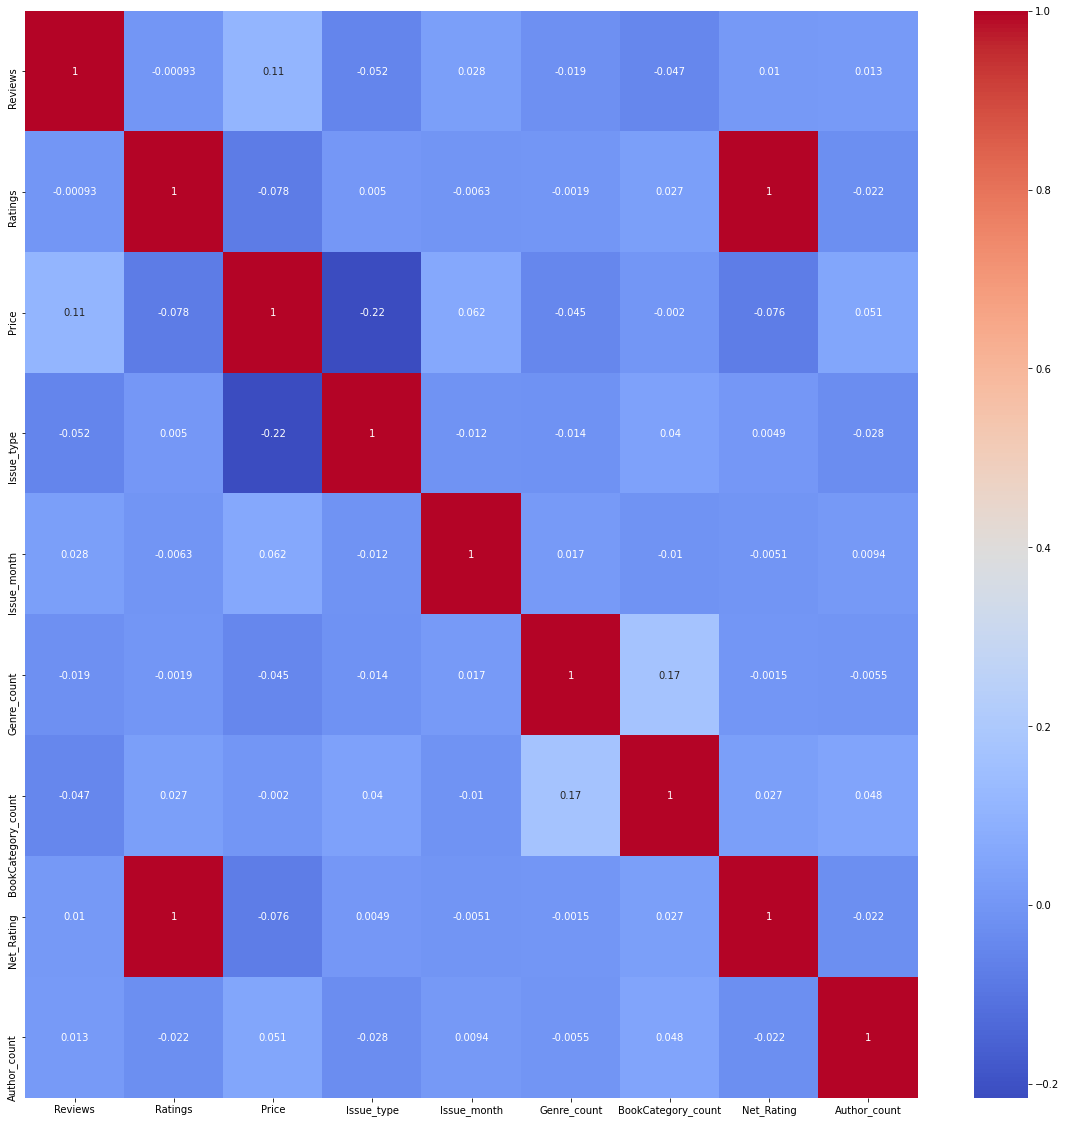

In [530]:
correlation_mat = combined.corr()
top_corr_features = correlation_mat.index
plt.figure(figsize=(20,20))
g= sns.heatmap(final[top_corr_features].corr(),annot=True,cmap="coolwarm")

In [531]:
final.columns

Index(['Price', 'Reviews', 'Ratings', 'Issue_type', 'Issue_month',
       'Genre_count', 'BookCategory_count', 'Net_Rating', 'Review_Impact',
       'Author_count', 'Book_age', 'and', 'book', 'for', 'guide', 'how', 'in',
       'of', 'the', 'to', 'with', 'action', 'adventure', 'arts', 'biographies',
       'comics', 'computing', 'crime', 'diaries', 'digital media', 'film',
       'humour', 'internet', 'language', 'linguistics', 'mangas', 'mystery',
       'photography', 'politics', 'romance', 'sports', 'thriller',
       'true accounts', 'writing', 'action', 'adventure ', 'autobiographies ',
       'biographies', 'comics', 'contemporary fiction ', 'crime', 'mystery ',
       'romance ', 'thriller', 'agatha christie', 'albert uderzo',
       'bill watterson', 'dk', 'herge', 'james patterson', 'john grisham',
       'ladybird', 'nora roberts', 'p.g. wodehouse', 'author', 'best', 'book',
       'life', 'love', 'man', 'new', 'story', 'time', 'world'],
      dtype='object')

In [532]:
X=final.iloc[:,1:] #separating inputs and outputs
y=final.iloc[:,0]

In [533]:
print(X.shape)
print(y.shape)

(7797, 73)
(7797,)


In [534]:
###Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ValueError: ignored

In [ ]:
train = final[final['Price'].notna()]
test = df[df['Price'].isna()]
test.drop(['Price'], axis=1, inplace=True)

In [ ]:
X = train.loc[:, train.columns != 'Price'].values
X = X.astype(float)

# Dependent Variable

y = np.log1p(train['Price'].values)
y = y.astype(float)

# Test - (Independent Variables)

test = test.loc[:].values
test = test.astype(float)

In [ ]:
train = df[df['Price'].notna()]
test = df[df['Price'].isna()]
test.drop(['Price'], axis=1, inplace=True)

In [ ]:
train = train[train['Price'] <= 12000]

In [ ]:
X = train.loc[:, train.columns != 'Price'].values
X = X.astype(float)

# Dependent Variable

y = np.log1p(train['Price'].values)
y = y.astype(float)

# Test - (Independent Variables)

test = test.loc[:].values
test = test.astype(float)

Machine Learning


In [ ]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import make_scorer
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection \
    import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble \
    import RandomForestRegressor, VotingRegressor, AdaBoostRegressor

In [ ]:
#RF
rf = RandomForestRegressor(random_state=0,bootstrap=False,max_features='sqrt')

cvs = cross_val_score(rf, X, y, cv=5,verbose=2,n_jobs=-1,
                      scoring=make_scorer(score,greater_is_better=True))
mean_score = sum(cvs)/len(cvs)
print("Average Score:",mean_score)